<a href="https://colab.research.google.com/github/SeepathiSaiRaj/SaiRaj/blob/main/Med_insur_cost_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Data Collection and Analysis

In [ ]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-16-4016315809.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


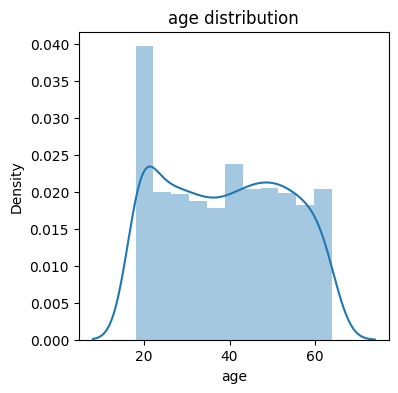

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df['age'])
plt.title('age distribution')
plt.show()

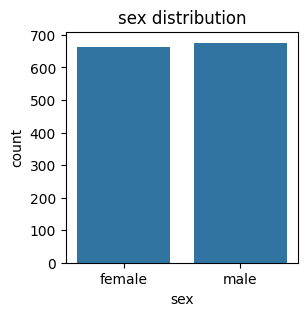

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x = df['sex'])
plt.title('sex distribution')
plt.show()

In [ ]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-21-378096564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['children'], palette='viridis')


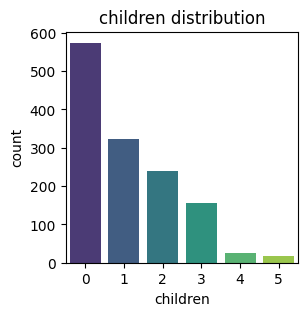

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x = df['children'], palette='viridis')
plt.title('children distribution')
plt.show()

In [ ]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


Data Pre-processing

In [ ]:
#encoding
df.replace({'sex':{'male':0,'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Splitting the features and dataset


In [ ]:
x = df.drop(columns='charges', axis=1)
y = df['charges']

In [ ]:
model = LinearRegression().fit(x,y)
model.score(x,y)

0.7504397033719741

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(1338,) (1070,) (268,)


Model evaluation


In [ ]:
#predict
input = (31,1,25.74,0,1,0)
input_array = np.asarray(input)
input_reshape = input_array.reshape(1,-1)
prediction = model.predict(input_reshape)
print(prediction)

[3733.32117344]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
import gradio as gr

In [54]:
def predict_insurance_charge(age, sex, bmi, children, smoker, region):
    input_data = np.array([age, sex, bmi, children, smoker, region]).reshape(1, -1)
    prediction = model.predict(input_data)
    return prediction[0]

headline = "Insurance Charges Prediction"
iface = gr.Interface(
    fn=predict_insurance_charge,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Sex (0 for male, 1 for female)"),
        gr.Number(label="BMI"),
        gr.Number(label="Children"),
        gr.Number(label="Smoker (0 for yes, 1 for no)"),
        gr.Number(label="Region (0:southeast, 1:southwest, 2:northeast, 3:northwest)")
    ],
    outputs="number",
    title=headline
)
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d4b4a5f0160f11ad3c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
